<h3 align="center">  </h3>

# <center>**Coding Activity - Clustering**</center>



**Group Members:**




*   206064A - K.A.R.P.Kumarasingha
*   206121X - M.W.S.A.U. Silva






---

Consider the planet data stored in the `planet.csv` file. These data give values of three features for 101 exoplanets discovered up to October 2002. We are interested in clustering the exoplanets based on these features. Note that an exoplanet is a planet located outside the solar system. You may read about them at https://en.wikipedia.org/wiki/Exoplanet. The features recorded are - `Mass` (in Jupiter mass), `Period` (in Earth days), and `Eccentricity`.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Load Libraries
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/7_Semester/ML/planet.csv')

# Display the first few rows of the DataFrame
print(df.head())
print("Shape of the dataset:", df.shape)

    Mass  Period  Eccentricity
0  0.120   4.950          0.00
1  0.197   3.971          0.00
2  0.210  44.280          0.34
3  0.220  75.800          0.28
4  0.230   6.403          0.08
Shape of the dataset: (101, 3)


</br>

#### **a)  Perform an exploratory analysis of the data. Be sure to examine the univariate distributions of the variables and their bivariate relationships using appropriate plots and summary statistics.**

**a.1. <u>Summary Statistics</u>**

In [10]:
# Display summary statistics
print(df.describe())

             Mass       Period  Eccentricity
count  101.000000   101.000000    101.000000
mean     3.327287   666.531252      0.281548
std      3.680601   873.749838      0.210943
min      0.050000     2.985000      0.000000
25%      0.930000    44.280000      0.100000
50%      1.760000   337.110000      0.270000
75%      4.140000  1089.000000      0.410000
max     17.500000  5360.000000      0.927000


**a.2. <u>Univariate Analysis</u>**

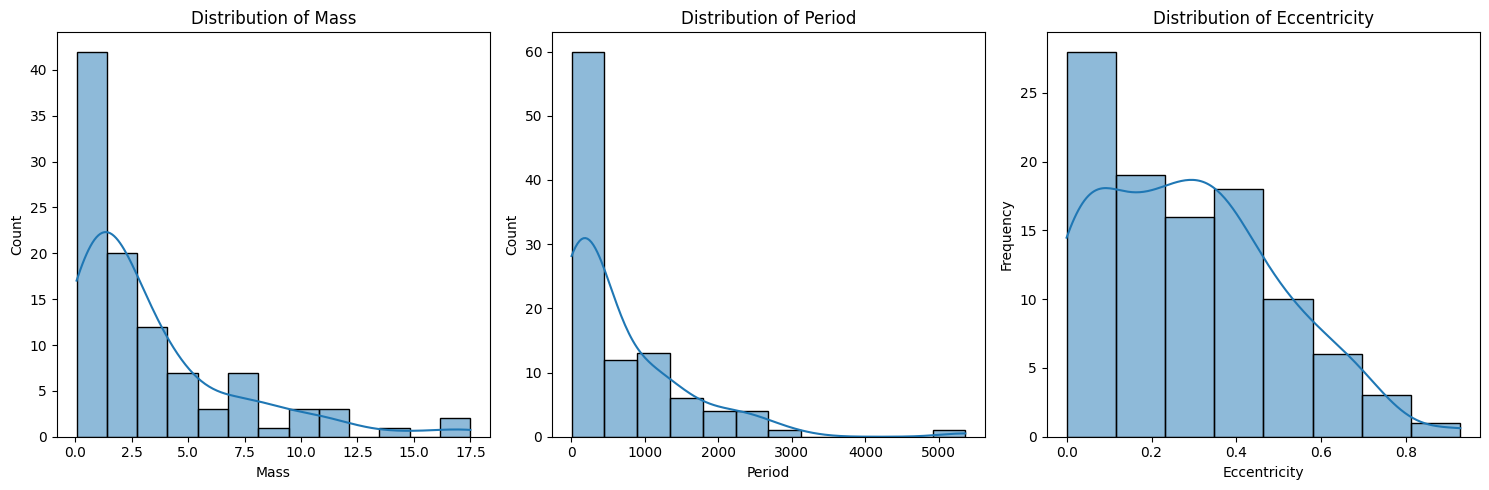

In [11]:
# Histograms
plt.figure(figsize=(15, 5))
for i, column in enumerate(df.columns):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

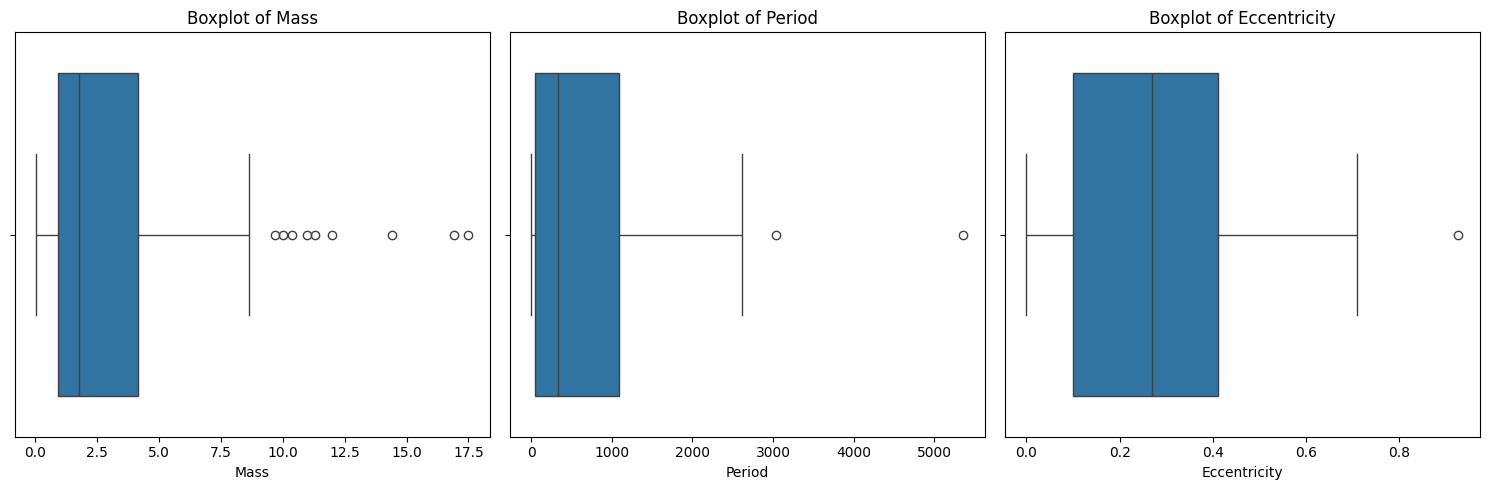

In [12]:
# Box plots
plt.figure(figsize=(15, 5))
for i, column in enumerate(df.columns):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
plt.xlabel(column)
plt.tight_layout()
plt.show()

**a.3. <u>Bivariate Analysis**</u>

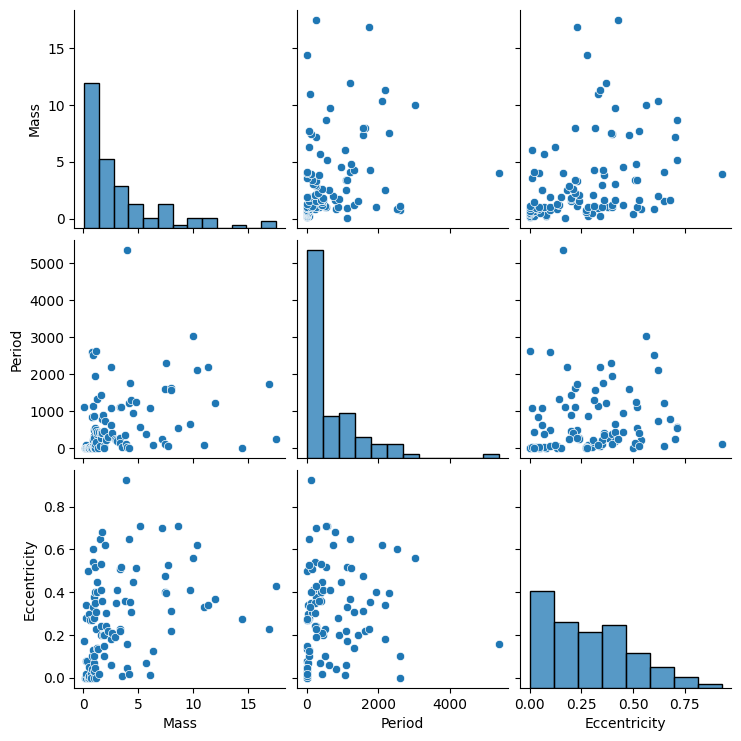

In [13]:
# Pair plot
sns.pairplot(df)
plt.show()

                  Mass    Period  Eccentricity
Mass          1.000000  0.268409      0.304933
Period        0.268409  1.000000      0.144593
Eccentricity  0.304933  0.144593      1.000000


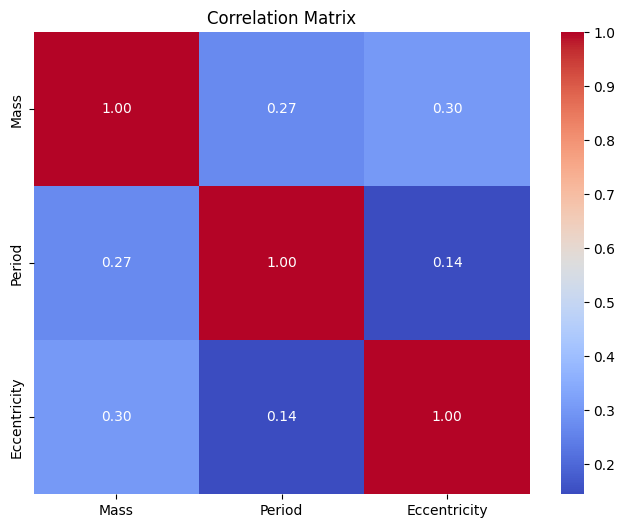

In [14]:
# Calculate the correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Mass and Period:**

* The correlation coefficient between mass and period is 0.268.
This positive correlation suggests that there is a weak tendency for objects with higher masses to have longer periods.
The correlation is not particularly strong.  that mass and period are only mildly related in this dataset.
</br>
</br>

**Mass and Eccentricity:**
*  The correlation coefficient between mass and eccentricity is 0.305.
This positive correlation suggests that there is a weak tendency for objects with higher masses to have higher eccentricities.
Similarly to the mass-period relationship, the correlation is not very strong, that while there is a connection, it's not a definitive one.
</br>
</br>

**Period and Eccentricity:**
* The correlation coefficient between period and eccentricity is 0.145.
This positive correlation suggests that there is a very weak tendency for objects with longer periods to have higher eccentricities.
However, this correlation is quite weak,  that period and eccentricity are largely independent of each other in this dataset.
</br>
</br>

#### **b)  Do you think standardizing the variables before clustering would be a good idea? Justify your answer.**

* Standardizing variables  is generally a good idea before clustering when the variables are measured in different units or have different scales. This ensures that each variable contributes equally to the clustering process and prevents variables with larger scales from dominating the clustering results.

* The features Mass, Period, and Eccentricity are measured in different units (Jupiter mass, Earth days, and dimensionless), so standardizing them would be beneficial.

* Standardizing ensures that each variable contributes equally to the clustering process by putting them on the same scale. Without standardization, variables with larger scales might dominate the clustering results simply because of their larger numerical values.

* Clustering algorithms like KMeans rely on distance measures to partition the data. Standardizing variables prevents variables with larger scales from having a disproportionately large impact on distance calculations which can lead to faster convergence and more stable clustering results.


* Standardization makes the interpretation of cluster centroids more straightforward. Without standardization, it can be challenging to interpret the relative importance of each variable in determining cluster membership.

* Handles outliers better: Standardization can help mitigate the influence of outliers. it is making clustering algorithms more robust to extreme values that may skew the results.

* Visualizing the distribution of each feature before and after standardization can highlight how standardization transforms the data onto a common scale.

In [15]:
# Display the first few rows of the scaled data
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

print(pd.DataFrame(df_scaled, columns=df.columns).head())

       Mass    Period  Eccentricity
0 -0.875749 -0.760951     -1.341363
1 -0.854724 -0.762077     -1.341363
2 -0.851175 -0.715714      0.278482
3 -0.848444 -0.679459     -0.007373
4 -0.845714 -0.759280     -0.960223


* Bellow visualization is about standardizing the features (Mass, Period, Eccentricity) and visualizing their distributions before and after standardization.  The selected features are then standardized using StandardScaler from scikit-learn. This ensures that each feature has a mean of 0 and a standard deviation of 1 by making them facilitating clustering algorithms.

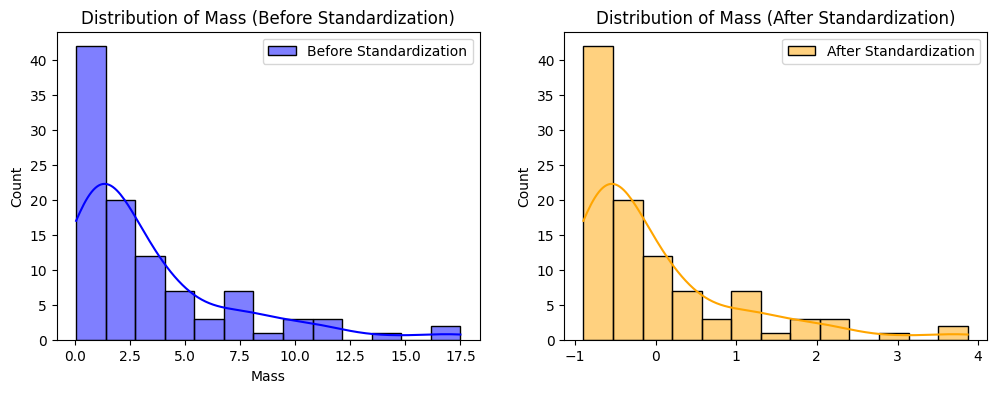

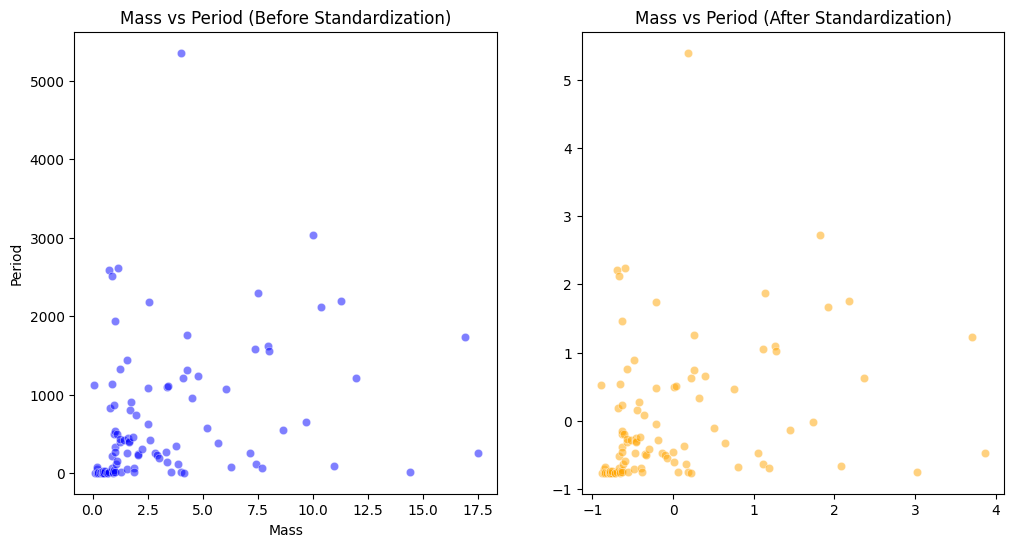

In [16]:
# Separate the features (Mass, Period, Eccentricity)
features = df[['Mass', 'Period', 'Eccentricity']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Visualize feature distribution before and after standardization
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Mass'], kde=True, color='blue', alpha=0.5, label='Before Standardization')
plt.title('Distribution of Mass (Before Standardization)')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(scaled_features[:, 0], kde=True, color='orange', alpha=0.5, label='After Standardization')
plt.title('Distribution of Mass (After Standardization)')
plt.legend()
plt.show()

# Visualize scatter plot of Mass vs Period before and after standardization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Mass', y='Period', color='blue', alpha=0.5)
plt.title('Mass vs Period (Before Standardization)')
plt.subplot(1, 2, 2)
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], color='orange', alpha=0.5)
plt.title('Mass vs Period (After Standardization)')
plt.show()

</br>

#### **c)  Would you use metric-based or correlation-based distance to cluster the exoplanets? Justify your answer.**

* Metric-based distance is suitable when the absolute values of the features are meaningful and comparable. It calculates the distance between data points based on the Euclidean distance or other distance metrics.

* Correlation-based distance is suitable when the relative relationships between variables are more important than their absolute values. It calculates the distance between data points based on their correlation coefficients.

* In our case, since we are interested in clustering exoplanets based on their features (Mass, Period, Eccentricity), and these features are measured in meaningful units, we'll use metric-based distance

</br>

**Justification to choose Metric-based method for clustering:**

* Suitable for data with meaningful numerical values where the absolute distances between data points matter.

* And to identify clusters based on the individual feature values rather than their relationships. and Commonly used distance metrics include Euclidean distance, Manhattan distance, and Minkowski distance.

* Appropriate when the features have clear interpretations in terms of their numerical values. Applicability to our data. The features Mass, Period, and Eccentricity are measured in meaningful units, making metric-based distance a suitable choice.

* We are interested in clustering exoplanets based on the actual distances between their feature values, such as the distance in Mass, Period, and Eccentricity.

* While correlation-based distance may be informative in some contexts, it may not be the best choice for our dataset. The features Mass, Period, and Eccentricity have clear interpretations in terms of their numerical values to make the metric-based distance more appropriate.

* Clustering based on correlation distance might overlook important variations in the actual feature values for example especially if the goal is to identify clusters based on the absolute differences in Mass, Period, and Eccentricity.

* Considering that the dataset consists of meaningful numerical features (Mass, Period, and Eccentricity) where the absolute distances between data points matter, we would use metric-based distance for clustering the exoplanets. This approach will enable us to capture the variations in Mass, Period, and Eccentricity directly, providing insights into the distinct groups of exoplanets based on their feature values.



</br>

#### **d)  Regardless of your answers in (b) and (c), standardize the variables and hierarchically cluster the exoplanets using complete linkage and Euclidean distance. Display the results using a dendogram. Cut the dendogram at a height that results in three distinct clusters. Summarize the cluster-specific means of the three variables (on the original scale) in a tabular form. Also, make pairwise scatterplots of the three variables (on the original scale) and show the three clusters in different colors.**



*   Since we already standardize the variables in part (b) here we use those "scaled_features".



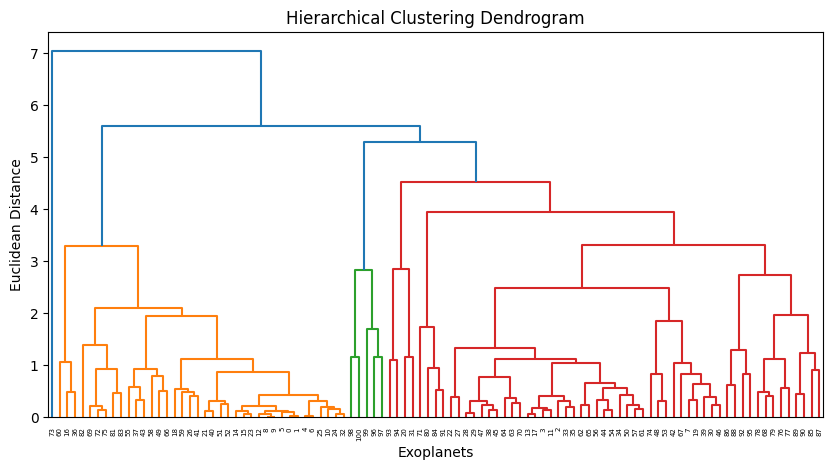

In [22]:
# Hierarchical clustering
Z = linkage(scaled_features, method='complete', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Exoplanets')
plt.ylabel('Euclidean Distance')
plt.show()

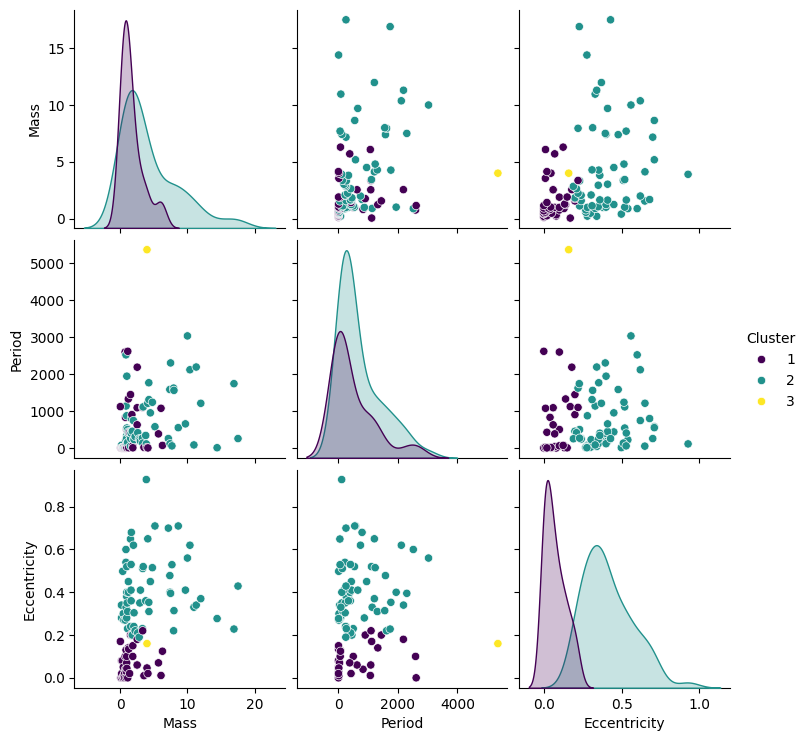

             Mass       Period  Eccentricity
Cluster                                     
1        1.703316   488.747927      0.070771
2        4.311774   699.794116      0.412694
3        4.000000  5360.000000      0.160000


In [21]:
# Cut dendrogram to get 3 clusters
k = 3
Z = linkage(df_scaled, method='complete', metric='euclidean')
clusters = fcluster(Z, k, criterion='maxclust')
df['Cluster'] = clusters
cluster_means = df.groupby('Cluster').mean()

# Pairwise scatterplots
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()
print(cluster_means)

</br>

#### **e) Repeat (d) using K-means clustering with K=3. (Of course, you won't have a dendogram in this case.) Compare the conclusions with (d).**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


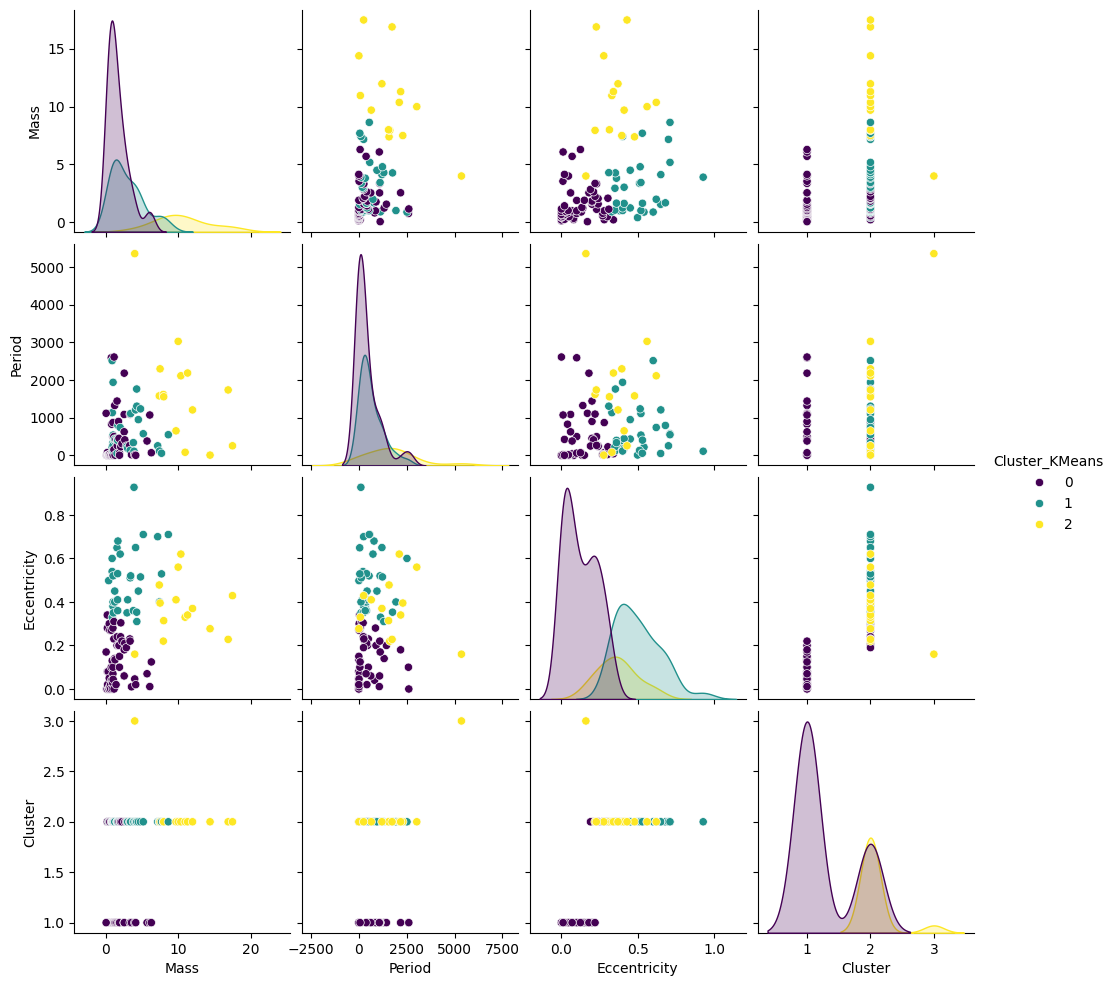

Cluster-Specific Means (K-means):
                     Mass       Period  Eccentricity   Cluster
Cluster_KMeans                                                
0                1.644000   420.610023      0.125987  1.296296
1                3.010000   633.403242      0.500061  2.000000
2               10.567857  1693.172014      0.366500  2.071429


In [23]:
from sklearn.cluster import KMeans

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(scaled_features)

# Add cluster labels to the dataframe
df['Cluster_KMeans'] = clusters_kmeans

# Summarize cluster-specific means
cluster_means_kmeans = df.groupby('Cluster_KMeans').mean()

# Pairwise scatterplots for K-means clustering
sns.pairplot(df, hue='Cluster_KMeans', palette='viridis')
plt.show()

# Display cluster-specific means for K-means clustering
print("Cluster-Specific Means (K-means):")
print(cluster_means_kmeans)

</br>

* There are several significant similarities and differences between the hierarchical clustering and K-means clustering results on the exoplanet dataset concerning the cluster-specific means for Mass, Period, and Eccentricity.

</br>

<u>Hierarchical Clustering</u>
* Cluster 1: This cluster has an extremely low average eccentricity of 0.070771, indicating more circular orbits, a lower average orbital period of 488.747927 Earth days, and a relatively low average mass of 1.703316 Jupiter masses.

* Cluster 2: More elongated orbits are indicated by this cluster's greater average mass of 4.311774 Jupiter masses, moderate average orbital period of 699.794116 Earth days, and higher average eccentricity of 0.412694.

* Cluster 3: This cluster is distinguished by its extraordinarily long average orbital period of 5360 Earth days and moderate average eccentricity of 0.160000. Its average mass is 4.000000 Jupiter masses.

</br>

<u>K-Means Clustering</u>

* Cluster 0: Characterized by a slightly higher average eccentricity of 0.125987 than its hierarchical counterpart, 420.610023 Earth days, and a low average mass of 1.644000 Jupiter masses.

* Cluster 1: This cluster has an average eccentricity of 0.500061, an average orbital period of 633.403242 Earth days, and a moderate average mass of 3.010000 Jupiter masses.

* Cluster 2: Compared to hierarchical clustering, this cluster has a slightly shorter average orbital period of 1693.172014 Earth days, a significantly higher average mass of 10.567857 Jupiter masses, and a relatively high average eccentricity of 0.366500.

</br>

<u>Comparative Analysis</u>

* Similar patterns are found by both clustering techniques: low mass clusters with shorter periods and moderate mass clusters that have higher eccentricity. But clusters with more extreme values especially for periods that exhibit very long periods and smaller eccentricities more circular orbits are typically the result of hierarchical clustering. K-means clustering, on the other hand, identifies a cluster that has a significantly higher mass and generally a higher eccentricity, suggesting longer extended orbits.

* These variations show how different hierarchical and K-means clustering techniques are from one another. The data's hierarchical structure influences hierarchical clustering, resulting in more distinct separation based on values that are extreme. Meanwhile, more balanced clusters are produced via K-means clustering, which seeks to reduce variation within clusters. This comparison highlights how crucial it is to choose the right clustering technique depending on the particulars and objectives of the study.

